### LOGISTIC REGRESSION     

In [1]:
#Add Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read CSV
df=pd.read_csv('baseball.csv')
df.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1232 entries, 0 to 1231
Data columns (total 15 columns):
Team            1232 non-null object
League          1232 non-null object
Year            1232 non-null int64
RS              1232 non-null int64
RA              1232 non-null int64
W               1232 non-null int64
OBP             1232 non-null float64
SLG             1232 non-null float64
BA              1232 non-null float64
Playoffs        1232 non-null int64
RankSeason      244 non-null float64
RankPlayoffs    244 non-null float64
G               1232 non-null int64
OOBP            420 non-null float64
OSLG            420 non-null float64
dtypes: float64(7), int64(6), object(2)
memory usage: 144.5+ KB


In [4]:
df1=df[['RankSeason','RankPlayoffs']].fillna(0).replace([6.0,5.0,4.0,3.0,2.0],1.0)
df1.head()

,RankSeason,RankPlayoffs
0,0.0,0.0
1,1.0,1.0
2,1.0,1.0
3,0.0,0.0
4,0.0,0.0


In [5]:
df2=df.drop(['RankSeason','RankPlayoffs'],axis=1)
df2.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,162,0.335,0.424


In [6]:
dff=pd.concat([df1,df2],axis=1)
dff.head()

,RankSeason,RankPlayoffs,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,G,OOBP,OSLG
0,0.0,0.0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,162,0.317,0.415
1,1.0,1.0,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,162,0.306,0.378
2,1.0,1.0,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,162,0.315,0.403
3,0.0,0.0,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,162,0.331,0.428
4,0.0,0.0,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,162,0.335,0.424


In [7]:
data=dff.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420 entries, 0 to 419
Data columns (total 15 columns):
RankSeason      420 non-null float64
RankPlayoffs    420 non-null float64
Team            420 non-null object
League          420 non-null object
Year            420 non-null int64
RS              420 non-null int64
RA              420 non-null int64
W               420 non-null int64
OBP             420 non-null float64
SLG             420 non-null float64
BA              420 non-null float64
Playoffs        420 non-null int64
G               420 non-null int64
OOBP            420 non-null float64
OSLG            420 non-null float64
dtypes: float64(7), int64(6), object(2)
memory usage: 52.5+ KB


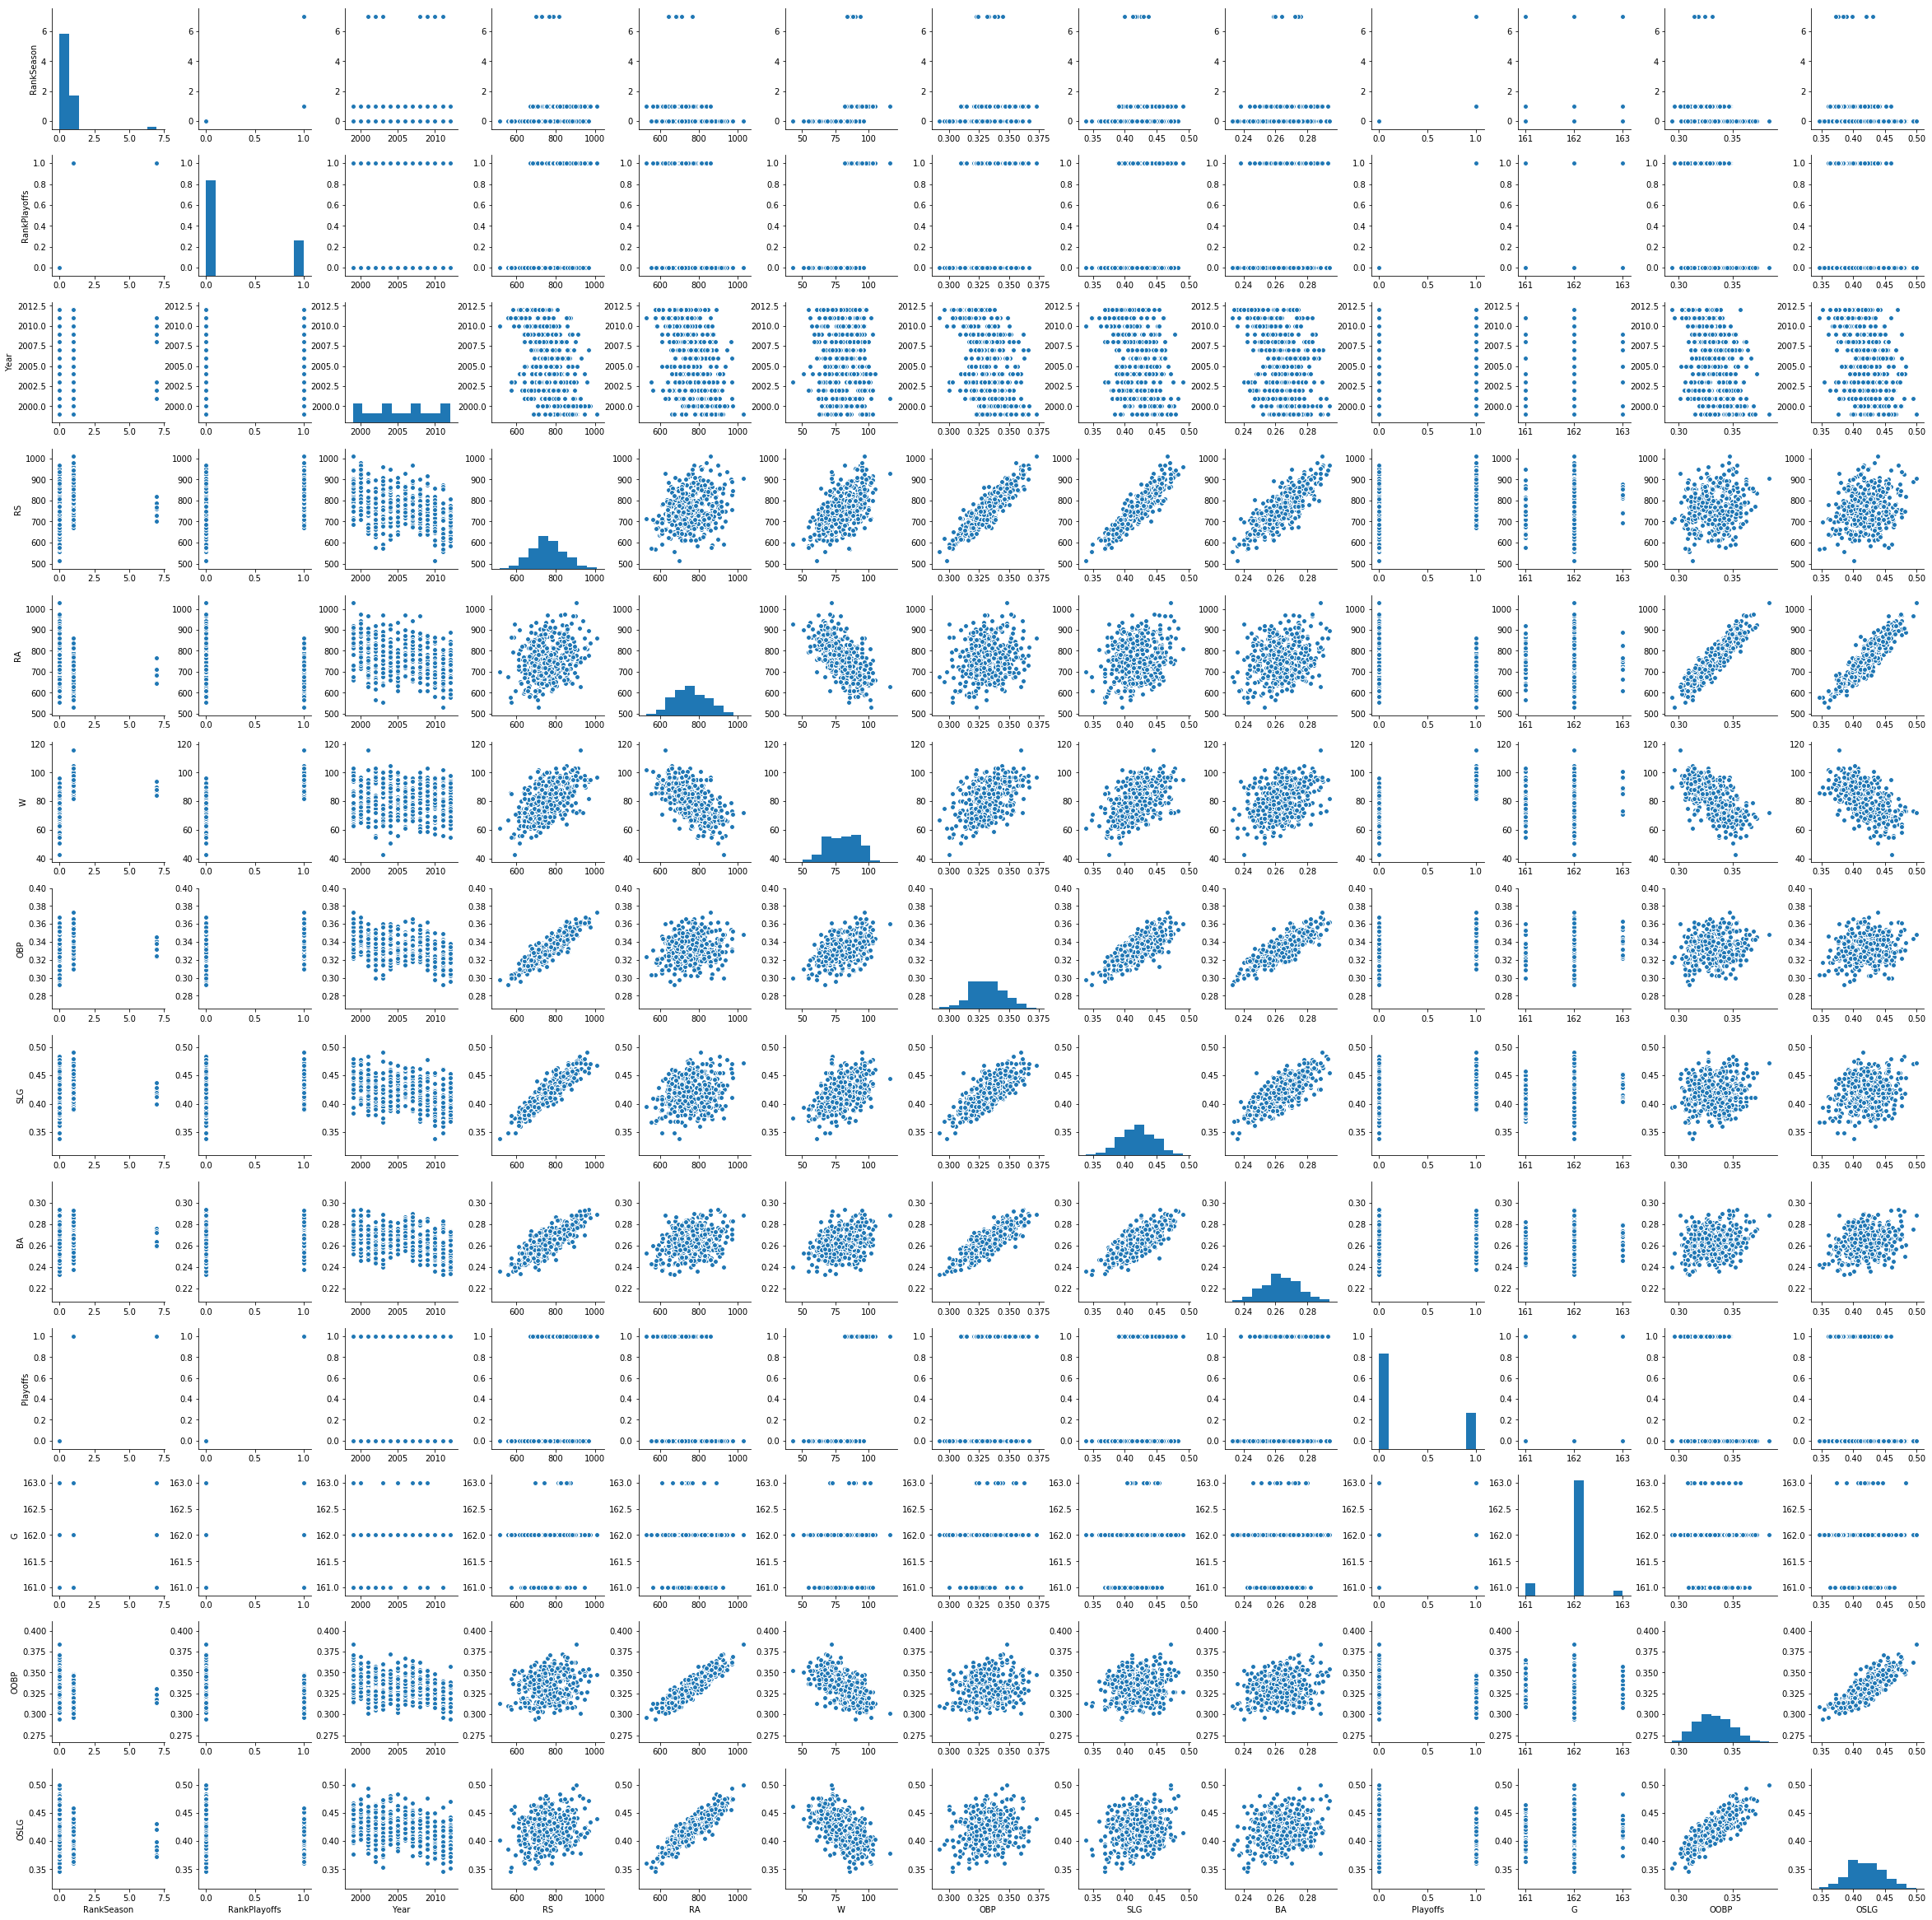

In [9]:
sns.pairplot(data)

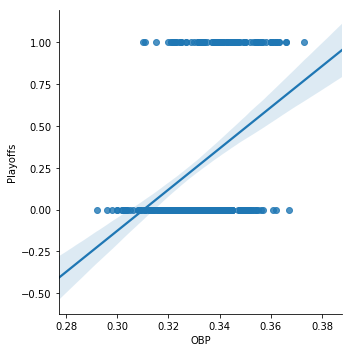

In [10]:
sns.lmplot('OBP','Playoffs',data=data)

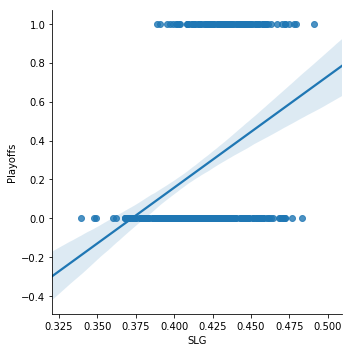

In [149]:
sns.lmplot('SLG','Playoffs',data=data)

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5]), <a list of 13 Text yticklabel objects>)

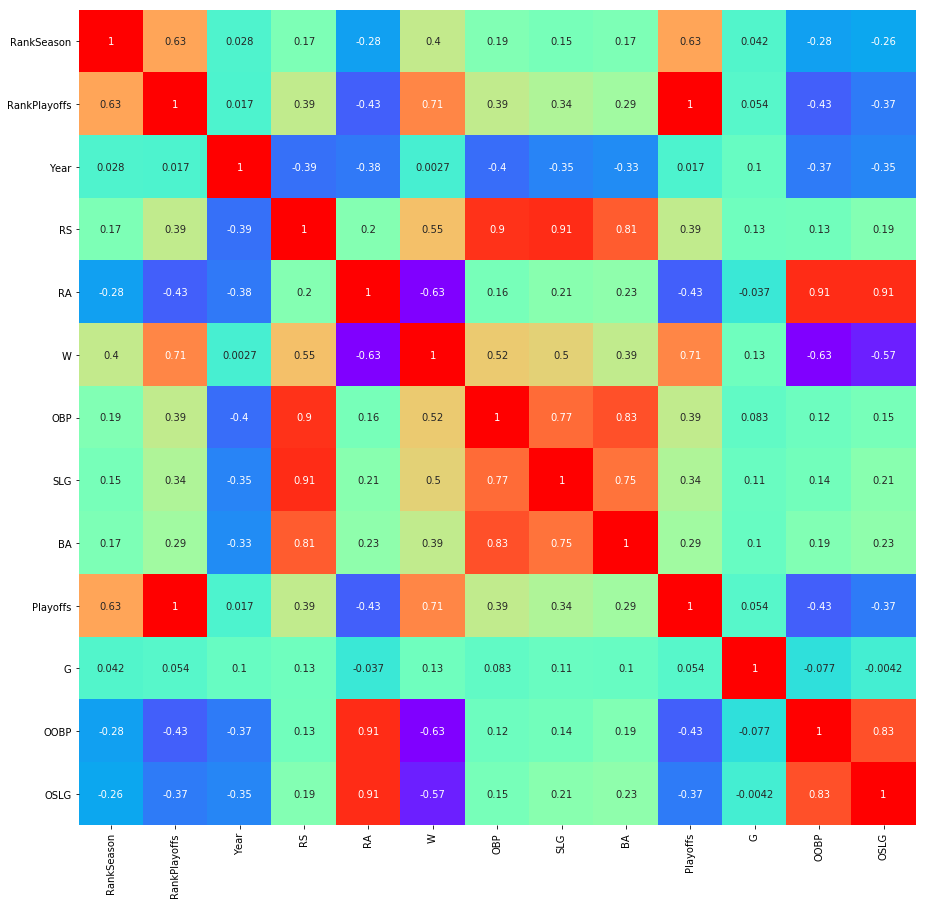

In [169]:
sns.heatmap(data.corr(),annot=True,cmap='rainbow',cbar=False)
plt.rcParams['figure.figsize']=(15,15)
plt.xticks(rotation=90)
plt.yticks(rotation=360)

In [137]:
from sklearn.linear_model import LogisticRegression,Ridge
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import linear_model
from sklearn import metrics

In [138]:
a=data[['W','RS','OBP','SLG','RA','OOBP','OSLG']]
b=data['Playoffs']

In [139]:
a_train,a_test,b_train,b_test=train_test_split(a, b, test_size=0.3, random_state=101)

In [140]:
log=LogisticRegression()
log.fit(a_train,b_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [141]:
predict=log.predict_proba(a_test)
predict

array([[  9.98686741e-01,   1.31325945e-03],
       [  1.63809508e-01,   8.36190492e-01],
       [  9.99910583e-01,   8.94174803e-05],
       [  8.13888885e-01,   1.86111115e-01],
       [  8.11896080e-01,   1.88103920e-01],
       [  8.35628123e-02,   9.16437188e-01],
       [  9.91667794e-01,   8.33220576e-03],
       [  8.05627458e-01,   1.94372542e-01],
       [  1.19731281e-01,   8.80268719e-01],
       [  1.91836163e-01,   8.08163837e-01],
       [  7.24768232e-01,   2.75231768e-01],
       [  9.55159026e-01,   4.48409739e-02],
       [  4.03868060e-02,   9.59613194e-01],
       [  9.99153550e-01,   8.46449553e-04],
       [  9.68975300e-01,   3.10246995e-02],
       [  9.99365962e-01,   6.34038244e-04],
       [  4.62849942e-01,   5.37150058e-01],
       [  1.73672197e-01,   8.26327803e-01],
       [  6.50510364e-01,   3.49489636e-01],
       [  9.99580895e-01,   4.19104873e-04],
       [  2.97535406e-01,   7.02464594e-01],
       [  9.95023534e-01,   4.97646564e-03],
       [  

In [142]:
log.coef_

array([[ 0.0934367 ,  0.01781758, -0.28526717, -0.26978229, -0.02904424,
        -0.31671421, -0.26424948]])

In [143]:
log.intercept_

array([-1.45608154])

In [144]:
log.decision_function(a_test)

array([ -6.63392898,   1.63015223,  -9.32210494,  -1.47547997,
        -1.46237777,   2.39489494,  -4.77925995,  -1.42184479,
         1.99497732,   1.43812312,  -0.96823839,  -3.05875553,
         3.16802713,  -7.07361315,  -3.44145548,  -7.36276704,
         0.14887459,   1.55982195,  -0.62128332,  -7.77697018,
         0.85906177,  -5.29804646,   0.59792342,  -3.16593134,
         0.74547353,  -1.94141609,  -7.35675873,  -3.89253656,
        -5.80532202,  -0.86624919,  -2.86942861,   1.80351566,
       -11.23979458,  -4.4427083 ,  -4.96192236,  -8.11885057,
        -2.40113455,  -8.2157781 ,  -1.27694011,  -4.72616168,
        -0.99552702,  -5.75365055,  -8.26880583,  -2.61640506,
        -8.20963477,  -7.8228205 ,   4.67685568,  -0.96401346,
        -2.24230239,  -0.32060297,  -6.1652081 ,  -6.83384989,
         0.38545208,  -0.08709847,  -0.16809508,  -5.83564715,
         2.21160063,  -0.34254763,   0.64671674,   1.46039269,
        -1.72781458,   1.41304532,  -1.1178797 ,  -7.16

In [145]:
b_pred=log.predict(a_test)
b_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0], dtype=int64)

In [152]:
from sklearn.metrics import classification_report,accuracy_score,roc_curve,roc_auc_score,auc
print(classification_report(b_test,b_pred))

             precision    recall  f1-score   support

          0       0.90      0.94      0.92        90
          1       0.84      0.75      0.79        36

avg / total       0.89      0.89      0.89       126



In [147]:
accuracy_score(b_test,b_pred)

0.88888888888888884

In [148]:
log_reg=pd.DataFrame([])
log_reg=log_reg.append(pd.DataFrame({'B_test':b_test,'B_pred':b_pred}),ignore_index=True)
log_reg.head()

,B_pred,B_test
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0


In [149]:
rmse_log=np.sqrt(metrics.mean_squared_error(b_test,b_pred))

#### ROC CURVE

In [154]:
fpr,tpr,thresholds= roc_curve(b_test,b_pred)
log_roc_auc=auc(fpr,tpr)

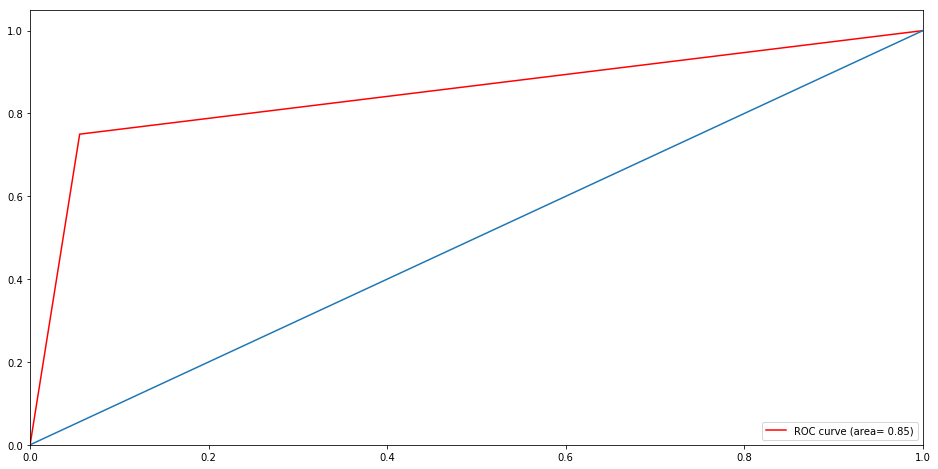

In [157]:
plt.figure(figsize=(16,8))
plt.plot(fpr,tpr,label="ROC curve (area= %0.2f)" % log_roc_auc,color="red")
plt.plot([0,1],[0,1])
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.legend(loc="lower right")
plt.show()

#### KFOLD Cross Validation

In [180]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5) # Define the split - into 2 folds 
kf.get_n_splits(a) # returns the number of splitting iterations in the cross-validator
print(kf) 

KFold(n_splits=5, random_state=None, shuffle=False)


In [181]:
test= list()
from sklearn.linear_model import LogisticRegression
for train_index, test_index in kf.split(a):
    
    a_train, a_test = a.iloc[train_index], a.iloc[test_index]
    b_train, b_test = b.iloc[train_index], b.iloc[test_index]    
    regressor =LogisticRegression()
    regressor.fit(a_train, b_train)
    b_pred = regressor.predict(a_test)
    print("TRAIN", train_index, "TEST", test_index)
    rmse = np.sqrt(metrics.mean_squared_error(b_test, b_pred))
    print(rmse)
    test.append(rmse)

TRAIN [ 84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191
 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209
 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227
 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245
 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263
 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281
 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299
 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317
 318 319 320 321 322 323 324 325 326 327 328 

In [182]:
print(test)

[0.28867513459481287, 0.34503277967117713, 0.3933978962347216, 0.3779644730092272, 0.34503277967117713]


In [183]:
kfold_avg=np.mean(test)
kfold_avg

0.35002061263622319

In [184]:
accuracy_score(b_test,b_pred)

0.88095238095238093

#### RIDGE REGRESSION

Text(0.5,1,' - Playoff outcome vs Predicted Playoff outcome: $Y_i$ vs $\\hat{y}_i$')

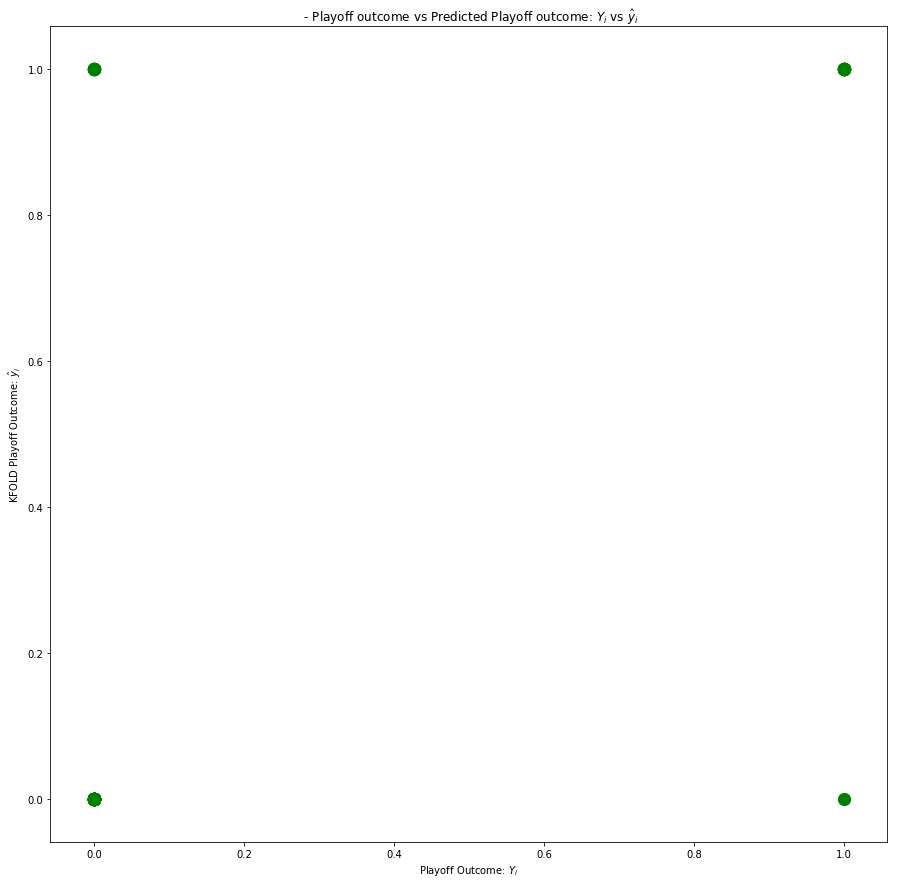

In [185]:
plt.scatter(b_pred,b_test,c='g',s=150)
plt.xlabel("Playoff Outcome: $Y_i$")
plt.ylabel("KFOLD Playoff Outcome: $\hat{y}_i$")
plt.title(" - Playoff outcome vs Predicted Playoff outcome: $Y_i$ vs $\hat{y}_i$")

In [164]:
ridge = Ridge(fit_intercept=True, alpha=0.5)
ridge.fit(a_train,b_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [165]:
b_pred = ridge.predict(a_test)

Text(0.5,1,'Ridge Regression - Playoff outcome vs Predicted Playoff outcome: $Y_i$ vs $\\hat{y}_i$')

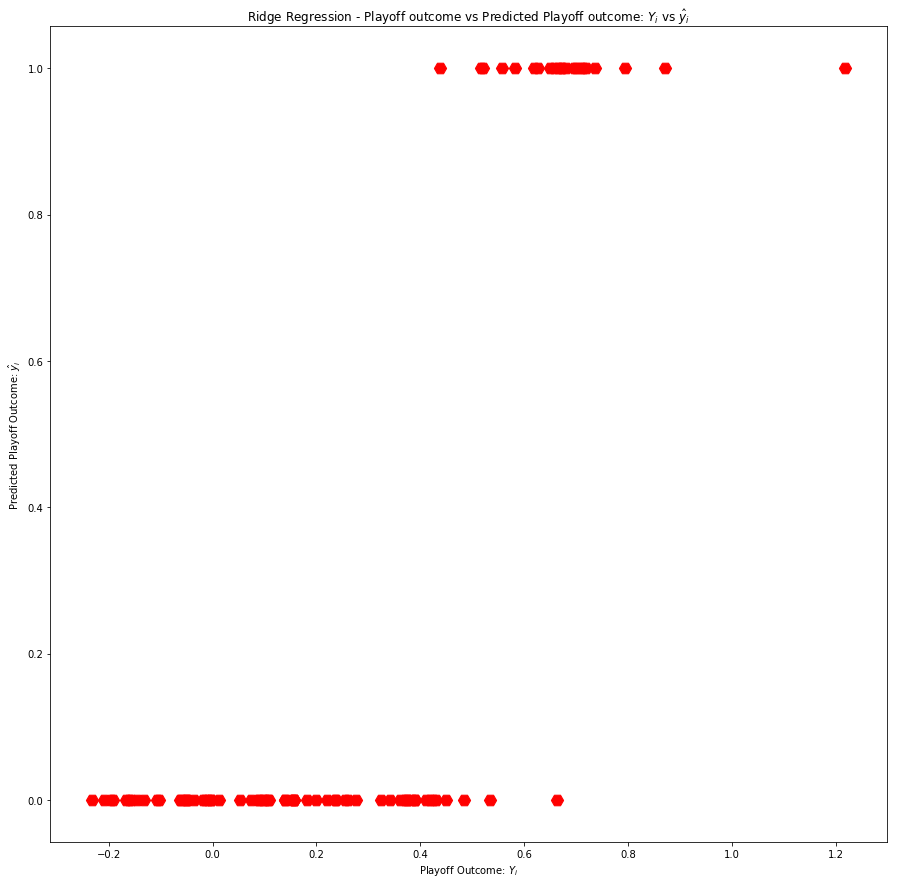

In [178]:
plt.scatter(b_pred,b_test,marker='H',c='red',s=150)
plt.xlabel("Playoff Outcome: $Y_i$")
plt.ylabel("Predicted Playoff Outcome: $\hat{y}_i$")
plt.title("Ridge Regression - Playoff outcome vs Predicted Playoff outcome: $Y_i$ vs $\hat{y}_i$")

In [167]:
rmse_ridge=np.sqrt(metrics.mean_squared_error(b_test,b_pred))
rmse_ridge

0.28389833097058254

In [168]:
print("The RMSE of Logistic Regression is %.5f" %rmse_log)
print("The RMSE of Cross_Validation using K-fold is %.5f" %kfold_avg)
print("The RMSE of Ridge Regression is ",rmse_ridge)

The RMSE of Logistic Regression is 0.33333
The RMSE of Cross_Validation using K-fold is 0.35002
The RMSE of Ridge Regression is  0.283898330971


Answering the following questions:
* Is the relationship significant? 
  - From the above graphs we can infer that relationship is significant. 
* Are any model assumptions violated?
  - Apart from Multi-collinearity between explanatory/predictor variables, All other assumptions are not violated.
* Cross-validate the model. How well did it do? 
  - From KFOLD and Ridge Regression method, we can say that rmse values were different for both the validation techniques